In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import tifffile
import numpy as np

In [3]:
def show_prediction(image_path, masks):
    image = tifffile.imread(image_path)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(masks), cmap='jet')
    plt.axis('off')
    plt.title('Prediction')

## Show how to use Cellpose

In [5]:
import cellpose_segmentation as cp

masks_cp = cp.predict('cyto3', 'MAX_registered-0008.tif', channels=[1,0], diameter=35)
print(masks_cp.shape)


: 

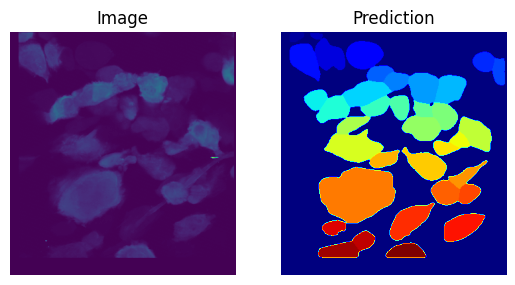

In [ ]:
show_prediction('MAX_registered-0008.tif', masks_cp)

## Show how to use StarDist

In [3]:
import stardist_segmentation as sd

masks_sd = sd.predict('2D_versatile_he', 'TCGA-18-5592-01Z-00-DX1.tif')
print(masks_sd.shape)

KeyboardInterrupt: 

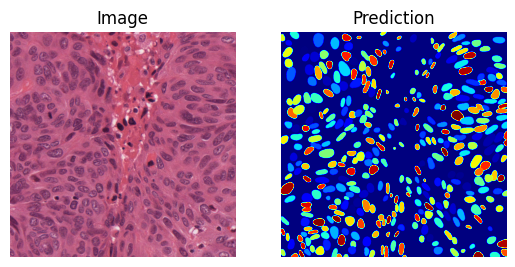

In [4]:
show_prediction('TCGA-18-5592-01Z-00-DX1.tif', masks_sd)

## Show how to use DeepCell

In [3]:
import deepcell_segmentation as dc

masks_dc = dc.predict('CytoplasmSegmentation', 'MAX_registered-0008.tif', image_mpp=.492)
print(masks_dc.shape)

2024-04-18 15:39:57.328573: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 368, 341, 1)


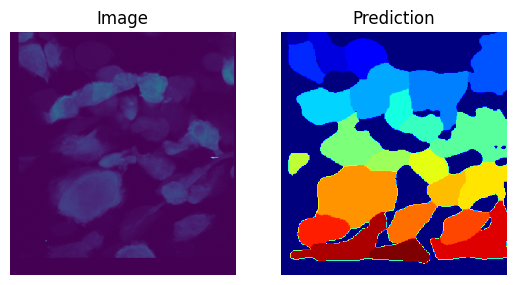

In [4]:
show_prediction('MAX_registered-0008.tif', masks_dc)

## Display testing functionality

In [4]:
def show_metrics(ious, metrics):
    ious = ious
    metric_breakdown = {
        'True Positives': metrics[1],
        'False Positives': metrics[2],
        'False Negatives': metrics[3]
    }

    x = np.arange(len(ious))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, axs = plt.subplots(ncols=2, figsize=(10,5) , layout='constrained')
    
    axs[0].plot(ious, metrics[0], '.-', lw=2)
    axs[0].set_title('Average Precisions')
    axs[0].set_xlabel('IOU Thresh')

    for name, value in metric_breakdown.items():
        offset = width * multiplier
        rects = axs[1].bar(x + offset, value, width, label=name)
        axs[1].bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[1].set_ylabel('Count')
    axs[1].set_title('Metrics')
    axs[1].set_xticks(x + width, ious)
    axs[1].legend(loc='upper left', ncols=4)

    plt.show()

### Load splice of test data from TissueNet

In [5]:
test_data = np.load(rf"C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1\test.npz")
print(test_data)
X_test = test_data['X'][0:100]
y_test = test_data['y'][0:100]

Test Cellpose evaluation

In [6]:
import cellpose_segmentation as cp

masks = [cp.predict('tissuenet_cp3', x, channels=[2,1], flow_threshold=0.8) for x in X_test]
predictions = np.array(masks)

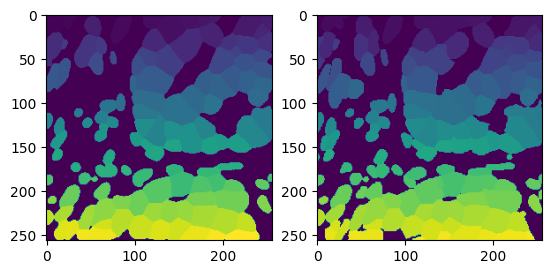

In [15]:
plt.subplot(1,2,1)
plt.imshow(masks[65])
plt.subplot(1,2,2)
plt.imshow(y_test[65,...,0])

0
b(0): metrics ([0. 0. 0. 0. 0.]) += result ([404. 404. 429. 489. 628.])
[array([0., 0., 0., 0., 0.]), array([227., 227., 202., 142.,   3.]), array([  0.,   0.,  25.,  85., 224.]), array([404., 404., 429., 489., 628.])]
b(1): metrics ([404. 404. 429. 489. 628.]) += result ([439. 444. 475. 523. 633.])
b(2): metrics ([ 843.  848.  904. 1012. 1261.]) += result ([ 912.  913.  929.  989. 1123.])
b(3): metrics ([1755. 1761. 1833. 2001. 2384.]) += result ([ 963.  966.  993. 1052. 1127.])
b(4): metrics ([2718. 2727. 2826. 3053. 3511.]) += result ([ 93.  93.  99. 116. 223.])
b(5): metrics ([2811. 2820. 2925. 3169. 3734.]) += result ([216. 216. 218. 225. 256.])
b(6): metrics ([3027. 3036. 3143. 3394. 3990.]) += result ([329. 329. 332. 344. 438.])
b(7): metrics ([3356. 3365. 3475. 3738. 4428.]) += result ([422. 422. 422. 426. 462.])
b(8): metrics ([3778. 3787. 3897. 4164. 4890.]) += result ([148. 148. 157. 180. 222.])
b(9): metrics ([3926. 3935. 4054. 4344. 5112.]) += result ([114. 114. 118. 141

c:\Users\aarus\miniforge3\envs\tooleval-3.10\lib\site-packages\cellpose\metrics.py:132: RuntimeWarning: invalid value encountered in divide
  ap[n] = tp[n] / (tp[n] + fp[n] + fn[n])


iou: 0.1 = 11108.0 / (11108.0 + 98.0 + 27355.0) = 0.2880630689038147
iou: 0.3 = 11086.0 / (11086.0 + 120.0 + 27377.0) = 0.2873286162299458
iou: 0.5 = 10640.0 / (10640.0 + 566.0 + 27823.0) = 0.2726177970227267
iou: 0.7 = 9215.0 / (9215.0 + 1991.0 + 29248.0) = 0.22778958817422257
iou: 0.9 = 2549.0 / (2549.0 + 8657.0 + 35914.0) = 0.05409592529711375


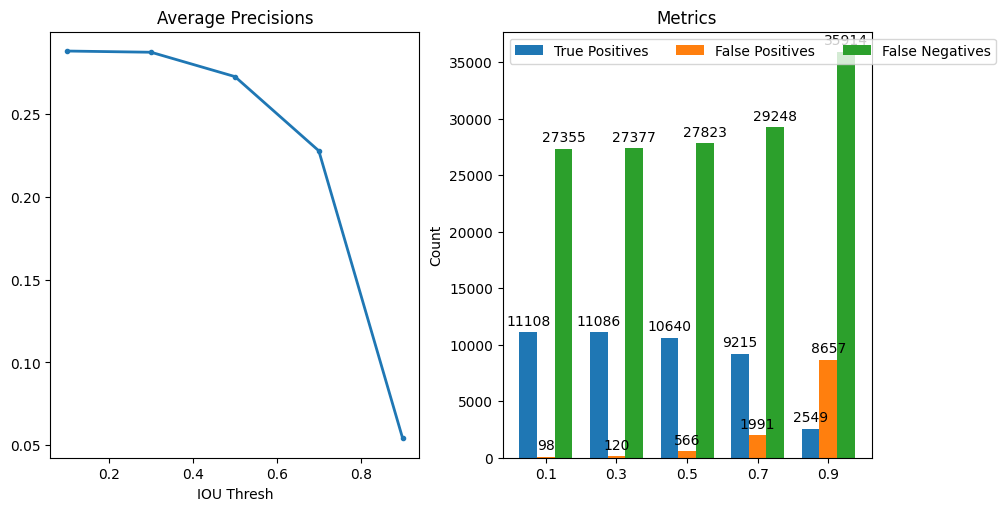

In [32]:
metrics = cp.evaluate(y_test[...,0], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

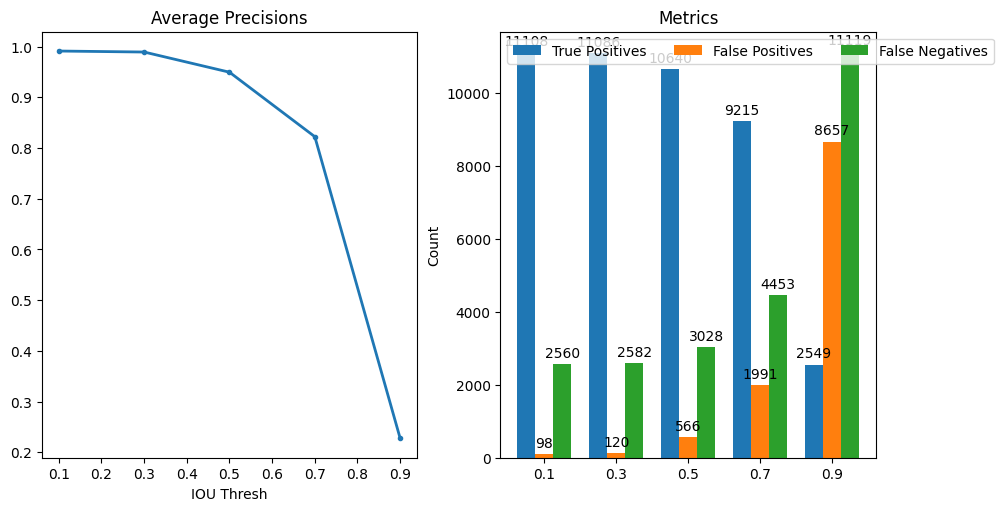

In [34]:
import stardist_segmentation as sd
metrics = sd.evaluate(y_test[..., 0], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

def show_metrics():


### Test with StarDist

In [15]:
import stardist_segmentation as sd
masks = [sd.predict('2D_versatile_fluo', x[...,0]) for x in X_test]
predictions = np.array(masks)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=

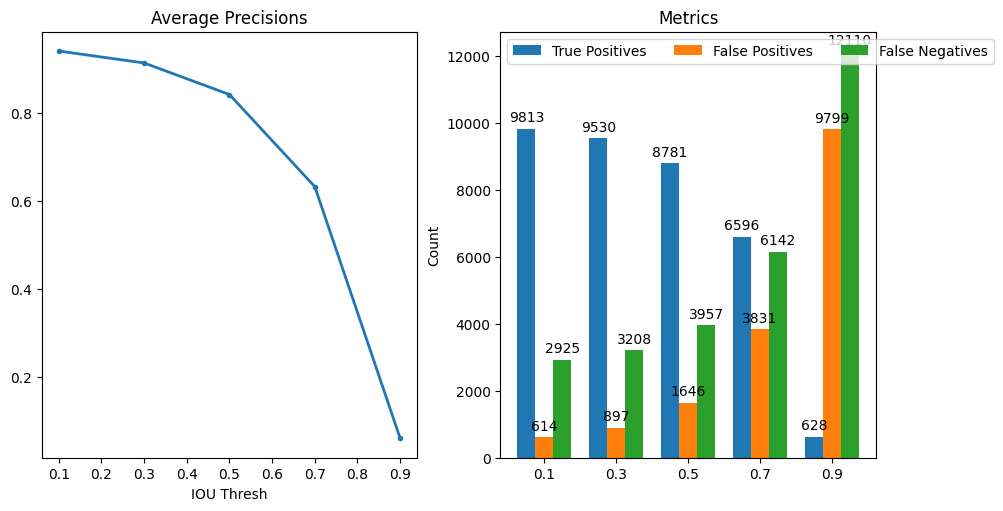

In [20]:
metrics = sd.evaluate(y_test[...,1], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)